<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# import pyforest
# import plotly
# import cufflinks as cf
# #Enabling the offline mode for interactive plotting locally
# from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
# init_notebook_mode(connected=True)
# cf.go_offline()
# #To display the plots
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
# from sklearn.metrics import make_scorer
# from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_curve, auc
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier

# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_columns', 1000)
# pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Oct 16 08:40:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_male = pd.read_csv("ANSUR II MALE Public.csv",encoding='latin-1')

df_female = pd.read_csv("ANSUR II FEMALE Public.csv",encoding='latin-1')

In [6]:
df = pd.concat([df_male, df_female])

In [7]:
dropped = ['subjectid', 'SubjectNumericRace', 'Ethnicity', 'Heightin', 'Weightlbs', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectId']

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.drop(dropped , axis = 1 ,inplace = True)

In [10]:
df.shape

(6068, 98)

In [11]:
df.isna().sum().sum()

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.0,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.0,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.0,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.0,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.0,1302.0,1349.00,1553.0
...,...,...,...,...,...,...,...,...
weightkg,6068.0,797.093935,156.528164,358.0,682.0,785.0,896.00,1442.0
wristcircumference,6068.0,169.002966,13.124513,124.0,159.0,170.0,179.00,216.0
wristheight,6068.0,830.059987,47.650519,672.0,797.0,830.0,863.00,1009.0
DODRace,6068.0,1.615030,0.979156,1.0,1.0,1.0,2.00,8.0


In [13]:
# for col in df.describe() :
#     if df.describe()[col]['std'] > df.describe()[col]['mean'] : 
#         print(col)

In [14]:
# for col in df.columns : 
#     if df[col].dtype != 'object':
#         fig = plt.figure()
#         sns.boxplot(data = df , y = df[col] , whis=3)

In [15]:
# def remove_outlier(df, col):
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1 
#     low_limit  = q1-1.5*iqr
#     high_limit = q3+1.5*iqr
#     df = df.loc[(df[col] > low_limit) & (df[col] < high_limit)]
#     return df

In [16]:
# for col in df.columns : 
#     remove_outlier(df,col)

In [17]:
# remove_outlier(df , 'abdominalextensiondepthsitting')

In [18]:
df.drop(df[df['DODRace'] > 3].index , axis = 0 , inplace = True)

In [19]:
df.shape

(5769, 98)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [20]:
X_ohe = pd.get_dummies(df.drop('DODRace' , axis = 1) , drop_first = True) # Get dummies might be better.
X = df.drop('DODRace' , axis = 1) # Or this.
y = df['DODRace']

In [21]:
X.select_dtypes('object').value_counts()

Gender  SubjectsBirthLocation  WritingPreference          
Male    New York               Right hand                     272
        California             Right hand                     241
        Texas                  Right hand                     229
        Indiana                Right hand                     183
        Oklahoma               Right hand                     149
                                                             ... 
        Mississippi            Either hand (No preference)      1
Female  United Kingdom         Left hand                        1
        Venezuela              Right hand                       1
Male    Mexico                 Left hand                        1
        Bolivia                Right hand                       1
Length: 357, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X_ohe,y, test_size = 0.2 , random_state = 53) # I'll give X_ohe first. Then I'll give only X.

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Scale always better.

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla modelin anlami; default degerler ile model kurulmasidir.

In [26]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=53, class_weight='balanced', solver='liblinear', max_iter=10000)

log_model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=53,
                   solver='liblinear')

In [27]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score , plot_confusion_matrix

In [28]:
log_y_train_pred = log_model.predict(X_train_scaled)
log_y_pred = log_model.predict(X_test_scaled)

In [29]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(plot_confusion_matrix(model,X_test,y_test))
    
    print()
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print(plot_confusion_matrix(model,X_train,y_train))


Test_Set
[[683  17  29]
 [ 18 255   5]
 [ 40  11  96]]
              precision    recall  f1-score   support

           1       0.92      0.94      0.93       729
           2       0.90      0.92      0.91       278
           3       0.74      0.65      0.69       147

    accuracy                           0.90      1154
   macro avg       0.85      0.84      0.84      1154
weighted avg       0.89      0.90      0.89      1154


Train_Set
[[2870   47  146]
 [  50  949   21]
 [ 141   28  363]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3063
           2       0.93      0.93      0.93      1020
           3       0.68      0.68      0.68       532

    accuracy                           0.91      4615
   macro avg       0.85      0.85      0.85      4615
weighted avg       0.91      0.91      0.91      4615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


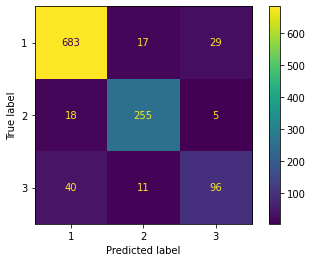

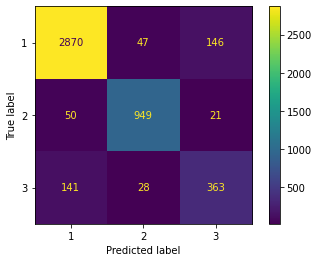

In [30]:
eval_metric(log_model , X_train_scaled , y_train , X_test_scaled , y_test)

In [31]:
# from sklearn.metrics import roc_auc_score , precision_recall_curve , plot_roc_curve , plot_precision_recall_curve # sklearn

In [32]:
from sklearn.metrics import roc_curve, precision_recall_curve , auc
from sklearn.model_selection import cross_validate

In [33]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

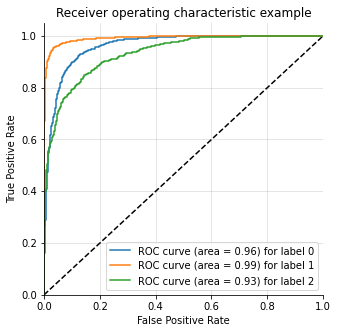

In [34]:
plot_multiclass_roc(log_model , X_train_scaled , y_train , 3 )

In [35]:
log_train_scores = cross_validate(log_model , X_train_scaled , y_train , scoring = 'accuracy' , cv = 5 )
log_test_scores = cross_validate(log_model , X_test_scaled , y_test , scoring = 'accuracy' , cv = 5  )

In [36]:
log_train_scores = pd.DataFrame(log_train_scores)

In [37]:
scores = pd.DataFrame(log_train_scores.mean()[2:] , columns = ['log_train'])

In [38]:
scores

,log_train
test_score,0.891874


In [39]:
log_test_scores = pd.DataFrame(log_test_scores)

In [40]:
scores = pd.concat([scores,pd.DataFrame(log_test_scores.mean()[2:] , columns = ['log_test'])] , axis = 1)

In [41]:
scores

,log_train,log_test
test_score,0.891874,0.875185


## Lojistic Regression solver "liblinear" for small dataset

__liblenear__ kucuk datasetlerinde iyi sonuclar verir. Dikkat edilmesi gereken husus; liblinear sadece __penalty="l1"__ ile calisir, yoksa hata verir.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
log_grid_model = LogisticRegression(random_state=53 , class_weight='balanced' , max_iter=10000)

In [44]:
# param_grid = {'C' : [1 , 3 ,5 , 8 , 10 , 15 , 20 ,30 , 50] , 'solver' : ['liblinear' , 'sag' , 'saga' , 'lbfgs'] ,  'penalty' : ['l1','l2'] } # C = 10 , l1 , liblinear

In [45]:
# log_grid_model = GridSearchCV(log_grid_model , param_grid=param_grid , cv=5 , scoring='accuracy' , verbose=2)

# log_grid_model.fit(X_train_scaled , y_train)

In [46]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [47]:
# C , penalty , l1_ratio , solver , max_iter , multi_class , class_weight 

In [48]:
# log_grid_model.best_params_

In [49]:
# log_grid_model.best_score_

In [50]:
log_grid_model = LogisticRegression(random_state=53 , solver = 'liblinear' , class_weight='balanced' , max_iter=10000 , C = 10 , penalty = 'l1').fit(X_train_scaled , y_train)

In [51]:
log_y_train_pred = log_grid_model.predict(X_train_scaled)
log_y_pred = log_grid_model.predict(X_test_scaled)

Test_Set
[[674  14  41]
 [ 17 257   4]
 [ 37  12  98]]
              precision    recall  f1-score   support

           1       0.93      0.92      0.93       729
           2       0.91      0.92      0.92       278
           3       0.69      0.67      0.68       147

    accuracy                           0.89      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.89      0.89      0.89      1154


Train_Set
[[2874   40  149]
 [  29  979   12]
 [ 113   25  394]]
              precision    recall  f1-score   support

           1       0.95      0.94      0.95      3063
           2       0.94      0.96      0.95      1020
           3       0.71      0.74      0.72       532

    accuracy                           0.92      4615
   macro avg       0.87      0.88      0.87      4615
weighted avg       0.92      0.92      0.92      4615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


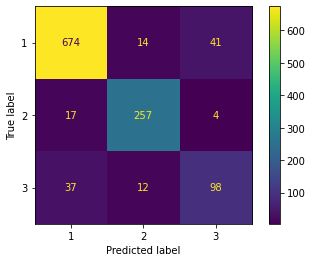

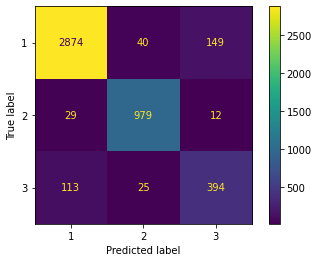

In [52]:
eval_metric(log_grid_model , X_train_scaled , y_train , X_test_scaled , y_test)

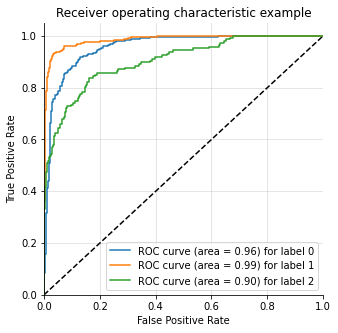

In [53]:
plot_multiclass_roc(log_grid_model,X_test_scaled,y_test,3)

In [54]:
log_grid_train_scores = cross_validate(log_grid_model , X_train_scaled , y_train , scoring = 'accuracy' , cv = 5 )
log_grid_test_scores = cross_validate(log_grid_model , X_test_scaled , y_test , scoring = 'accuracy' , cv = 5  )

In [55]:
log_grid_train_scores = pd.DataFrame(log_grid_train_scores)
log_grid_test_scores = pd.DataFrame(log_grid_test_scores)

In [56]:
log_grid_train_scores = pd.DataFrame(log_grid_train_scores.mean()[2:] , columns = ['log_grid_train'] , index = ['test_score'])
log_grid_test_scores = pd.DataFrame(log_grid_test_scores.mean()[2:] , columns = ['log_grid_test'] , index = ['test_score'])

In [57]:
scores

,log_train,log_test
test_score,0.891874,0.875185


In [58]:
scores = pd.concat([scores , log_grid_train_scores , log_grid_test_scores] , axis = 1)

In [59]:
scores

,log_train,log_test,log_grid_train,log_grid_test
test_score,0.891874,0.875185,0.898375,0.845718


## 2. SVC

### Vanilla SVC model 

Vanilla modellerde default degerler verilmeli ama dengesiz bir datasetimiz oldugu icin  class_weight düşünülmeli

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC(random_state = 53 , class_weight='balanced')

In [62]:
svc.fit(X_train_scaled , y_train)

SVC(class_weight='balanced', random_state=53)

In [63]:
y_train_pred = svc.predict(X_train_scaled)
y_pred = svc.predict(X_test_scaled)

Test_Set
[[615  18  96]
 [ 18 253   7]
 [ 20  10 117]]
              precision    recall  f1-score   support

           1       0.94      0.84      0.89       729
           2       0.90      0.91      0.91       278
           3       0.53      0.80      0.64       147

    accuracy                           0.85      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.88      0.85      0.86      1154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Train_Set
[[2596   55  412]
 [  40  940   40]
 [  67   19  446]]
              precision    recall  f1-score   support

           1       0.96      0.85      0.90      3063
           2       0.93      0.92      0.92      1020
           3       0.50      0.84      0.62       532

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


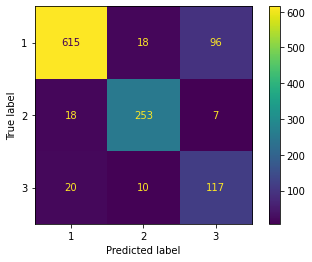

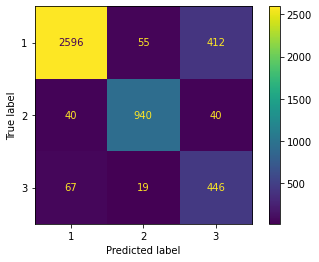

In [64]:
eval_metric(svc,X_train_scaled, y_train , X_test_scaled , y_test)

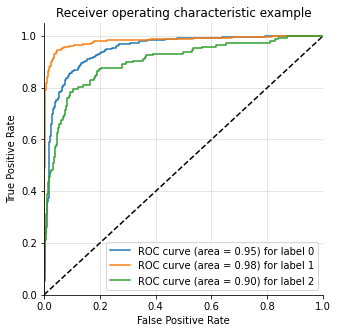

In [65]:
plot_multiclass_roc(svc,X_test_scaled,y_test,3)

In [66]:
svc_train = pd.DataFrame(cross_validate(svc,X_train_scaled , y_train , cv = 5 , scoring = 'accuracy' )).mean()[2:]

In [67]:
svc_train

test_score    0.839653
dtype: float64

In [68]:
svc_train = pd.DataFrame({'svc_train' : svc_train } , index = ['test_score'])

In [69]:
scores = pd.concat([scores,svc_train] , axis = 1)

In [70]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train
test_score,0.891874,0.875185,0.898375,0.845718,0.839653


In [71]:
svc_test = pd.DataFrame(cross_validate(svc,X_test_scaled , y_test , cv = 5 , scoring = 'accuracy' )).mean()[2:]

In [72]:
svc_test

test_score    0.805895
dtype: float64

In [73]:
svc_test = pd.DataFrame({'svc_test' : svc_test} , index = ['test_score'])

In [74]:
scores = pd.concat([scores,svc_test] , axis = 1)

In [75]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895


###  SVC Model GridsearchCV

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
grid_svc_model = SVC(random_state = 53 , class_weight = 'balanced' )

In [78]:
# C , kernel , degree , gamma , 

In [79]:
# param_grid = {'C' : [0.5 , 1,3,7,10,15,25] , 'kernel' : ['linear','poly','rbf'] , 'degree' : [2,3,4] , 'gamma' : ['scale','auto']}

In [80]:
# grid_svc_model = GridSearchCV(grid_svc_model , param_grid=param_grid , cv=5 , n_jobs = -1,  verbose = 2 , scoring='accuracy' ) # C = 25 , degree = 2 , gamma = scale , kernel = rbf

In [81]:
# grid_svc_model.fit(X_train_scaled , y_train)

In [82]:
# grid_svc_model.best_params_

In [83]:
grid_svc_model = SVC(random_state = 53 , class_weight = 'balanced' , C = 25 , kernel = 'rbf' , degree = 2 , gamma = 'scale').fit(X_train_scaled , y_train)

Test_Set
[[638  16  75]
 [ 20 249   9]
 [ 26  13 108]]
              precision    recall  f1-score   support

           1       0.93      0.88      0.90       729
           2       0.90      0.90      0.90       278
           3       0.56      0.73      0.64       147

    accuracy                           0.86      1154
   macro avg       0.80      0.84      0.81      1154
weighted avg       0.88      0.86      0.87      1154



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Train_Set
[[2812   27  224]
 [  11  998   11]
 [  20    3  509]]
              precision    recall  f1-score   support

           1       0.99      0.92      0.95      3063
           2       0.97      0.98      0.97      1020
           3       0.68      0.96      0.80       532

    accuracy                           0.94      4615
   macro avg       0.88      0.95      0.91      4615
weighted avg       0.95      0.94      0.94      4615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


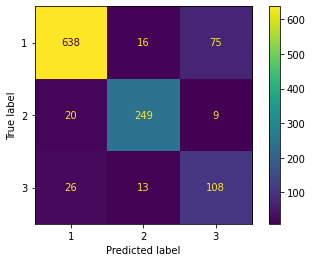

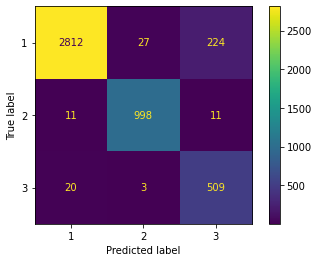

In [84]:
eval_metric(grid_svc_model,X_train_scaled, y_train , X_test_scaled , y_test)

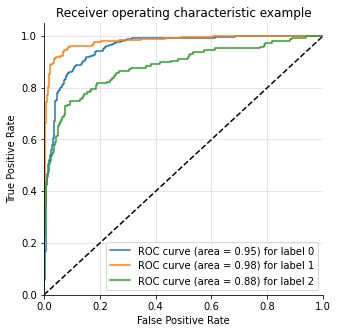

In [85]:
plot_multiclass_roc(grid_svc_model,X_test_scaled,y_test,3)

In [86]:
grid_svc_model = SVC(random_state = 53 , class_weight = 'balanced' , C = 25 , kernel = 'rbf', degree = 2 , gamma = 'scale' )

In [87]:
svc_grid_train = pd.DataFrame(cross_validate(grid_svc_model , X_train_scaled , y_train , scoring = 'accuracy' , cv = 5)).mean()[2:]

In [88]:
svc_grid_train

test_score    0.866956
dtype: float64

In [89]:
svc_grid_train = pd.DataFrame({'svc_grid_train' : svc_grid_train} , index = ['test_score'])

In [90]:
scores = pd.concat([scores,svc_grid_train] , axis = 1)

In [91]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956


In [92]:
svc_grid_test = pd.DataFrame(cross_validate(grid_svc_model , X_test_scaled , y_test , scoring = 'accuracy' , cv = 5)).mean()[2:]

In [93]:
svc_grid_test

test_score    0.85007
dtype: float64

In [94]:
svc_grid_test = pd.DataFrame({'svc_grid_test' : svc_grid_test} , index = ['test_score'])

In [95]:
scores = pd.concat([scores,svc_grid_test] , axis = 1)

In [96]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007


## 3. RF

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [98]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 53)

In [99]:
X_train

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
482,274,1346,309,218,1243,235,186,402,337,262,...,0,0,0,0,0,0,0,0,0,1
1590,322,1457,343,250,1334,261,201,407,355,275,...,0,0,0,0,0,0,0,0,0,1
3569,280,1434,337,240,1313,261,193,421,361,263,...,0,0,0,0,0,0,0,0,0,1
3697,299,1563,368,256,1438,284,218,428,444,317,...,0,0,0,0,0,0,0,0,1,0
1770,251,1359,312,230,1236,243,183,396,369,260,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820,201,1351,303,227,1261,218,164,372,270,256,...,0,0,0,0,0,0,0,0,0,1
701,219,1460,352,234,1352,258,198,400,318,282,...,0,0,0,0,0,0,0,0,0,1
3417,283,1330,308,215,1223,246,193,395,381,262,...,0,0,0,0,0,0,0,0,0,1
3068,225,1473,356,222,1356,253,216,416,350,259,...,0,0,0,0,0,0,0,0,0,1


In [100]:
X_test

In [101]:
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value' , unknown_value = -1)

X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

### Vanilla RF Model

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf = RandomForestClassifier(random_state = 53 , class_weight = 'balanced' )

In [104]:
rf.fit(X_train , y_train)

RandomForestClassifier(class_weight='balanced', random_state=53)

In [105]:
rf_y_train_pred = rf.predict(X_train)
rf_y_pred = rf.predict(X_test)

Test_Set
[[723   4   2]
 [ 84 192   2]
 [133   7   7]]
              precision    recall  f1-score   support

           1       0.77      0.99      0.87       729
           2       0.95      0.69      0.80       278
           3       0.64      0.05      0.09       147

    accuracy                           0.80      1154
   macro avg       0.78      0.58      0.58      1154
weighted avg       0.79      0.80      0.75      1154


Train_Set
[[3063    0    0]
 [   0 1020    0]
 [   0    0  532]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3063
           2       1.00      1.00      1.00      1020
           3       1.00      1.00      1.00       532

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


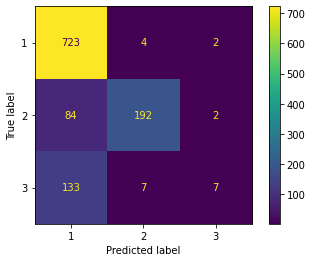

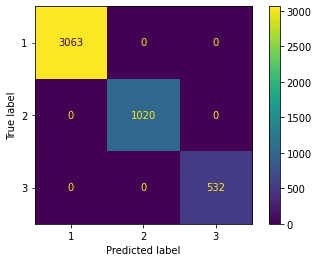

In [106]:
eval_metric(rf,X_train , y_train , X_test , y_test)

In [107]:
# plot_multiclass_roc(rf,X_test,y_test,3)

In [108]:
rf_train = pd.DataFrame(cross_validate(rf , X_train , y_train , cv = 5 , scoring = 'accuracy')).mean()[2:]

In [109]:
rf_train = pd.DataFrame({'rf_train' : rf_train} , index = ['test_score'] )

In [110]:
rf_train

,rf_train
test_score,0.805634


In [111]:
scores = pd.concat([scores,rf_train] , axis = 1)

In [112]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634


In [113]:
rf_test = pd.DataFrame(cross_validate(rf , X_test , y_test , cv = 5 , scoring = 'accuracy')).mean()[2:]

In [114]:
rf_test = pd.DataFrame({'rf_test' : rf_test} , index = ['test_score'] )

In [115]:
scores = pd.concat([scores,rf_test] , axis = 1) 

In [116]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train,rf_test
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634,0.772987


### RF Model GridsearchCV

In [117]:
rf_grid = RandomForestClassifier(random_state = 53 , class_weight = 'balanced' )

In [118]:
# n_estimator , criterion , max_depth , max_features , max_samples

In [119]:
param_grid = {'n_estimators' : [100,150,300,500,800] , 'criterion' : ['gini','entropy'] , 'max_depth' : [3,5,10,15,20 , None] ,
                               'max_features' : ['auto','sqrt','log2'] , 'max_samples' : [None,0.8,0.5]  } 

# criterion = entropy , max_depth = 10 , max_features = 'auto' , max_Samples = None , n_estimators = 800 for normal X features

In [120]:
rf_grid = GridSearchCV(rf_grid , param_grid = param_grid ,scoring = 'accuracy' ,  cv = 5 , verbose = 2 , n_jobs = -1 )

In [121]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [122]:
rf_grid.fit(X_train , y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=53),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 0.8, 0.5],
                         'n_estimators': [100, 150, 300, 500, 800]},
             scoring='accuracy', verbose=2)

In [123]:
rf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_samples': None,
 'n_estimators': 800}

In [124]:
rf_grid.best_score_

0.8294691224268689

In [125]:
# rf_grid = RandomForestClassifier(random_state = 53 , class_weight = 'balanced' , criterion = 'entropy' , max_depth = 10 , max_features = 'auto' , max_samples = None , n_estimators = 800 )

In [127]:
rf_grid = RandomForestClassifier(random_state = 53 , class_weight = 'balanced' , criterion = 'entropy' , max_depth = 10 , max_features = 'auto' , max_samples = None , n_estimators = 800 )

In [128]:
rf_grid_train = pd.DataFrame(cross_validate(rf_grid , X_train , y_train , cv = 5 , scoring = 'accuracy')).mean()[2:]

In [129]:
rf_grid_train = pd.DataFrame({'rf_grid_train' : rf_grid_train } , index = ['test_score'])

In [130]:
scores = pd.concat([scores,rf_grid_train] , axis = 1)

In [131]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train,rf_test,rf_grid_train
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634,0.772987,0.829469


In [132]:
rf_grid_test = pd.DataFrame(cross_validate(rf_grid , X_test , y_test , cv = 5 , scoring = 'accuracy')).mean()[2:]

In [133]:
rf_grid_test = pd.DataFrame({'rf_grid_test' : rf_grid_test } , index = ['test_score'])

In [134]:
scores = pd.concat([scores,rf_grid_test] , axis = 1)

In [135]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train,rf_test,rf_grid_train,rf_grid_test
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634,0.772987,0.829469,0.785104


## 4. XGBoost

### Vanilla XGBoost Model

In [136]:
from xgboost import XGBClassifier

In [137]:
xgb = XGBClassifier(random_state = 53)

In [138]:
xgb.fit(X_train , y_train)

XGBClassifier(objective='multi:softprob', random_state=53)

Test_Set
[[709  12   8]
 [ 45 231   2]
 [ 91  14  42]]
              precision    recall  f1-score   support

           1       0.84      0.97      0.90       729
           2       0.90      0.83      0.86       278
           3       0.81      0.29      0.42       147

    accuracy                           0.85      1154
   macro avg       0.85      0.70      0.73      1154
weighted avg       0.85      0.85      0.83      1154


Train_Set
[[3034   14   15]
 [ 107  912    1]
 [ 274   21  237]]
              precision    recall  f1-score   support

           1       0.89      0.99      0.94      3063
           2       0.96      0.89      0.93      1020
           3       0.94      0.45      0.60       532

    accuracy                           0.91      4615
   macro avg       0.93      0.78      0.82      4615
weighted avg       0.91      0.91      0.90      4615



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


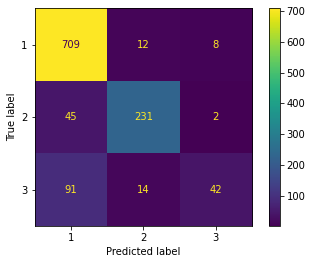

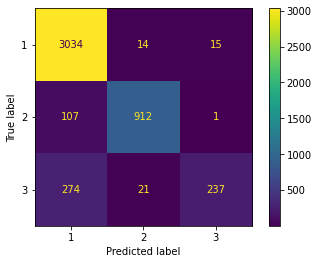

In [139]:
eval_metric(xgb,X_train,y_train,X_test,y_test)

In [140]:
xgb = XGBClassifier(random_state=53)

xgb_train = cross_validate(xgb, X_train, y_train, scoring = 'accuracy' , cv = 5)

In [141]:
xgb_train = pd.DataFrame(xgb_train).mean()[2:]

In [142]:
xgb_train = pd.DataFrame({'xgb_train' : xgb_train} , index = ['test_score'])

In [143]:
scores = pd.concat([scores,xgb_train] , axis = 1)

In [144]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train,rf_test,rf_grid_train,rf_grid_test,xgb_train
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634,0.772987,0.829469,0.785104,0.863272


In [145]:
xgb_test = cross_validate(xgb , X_test, y_test, scoring = 'accuracy' , cv = 5)

In [146]:
xgb_test = pd.DataFrame(xgb_test).mean()[2:]

In [147]:
xgb_test = pd.DataFrame({'xgb_test' : xgb_test} , index = ['test_score'])

In [148]:
scores = pd.concat([scores,xgb_test] , axis = 1)

In [149]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train,rf_test,rf_grid_train,rf_grid_test,xgb_train,xgb_test
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634,0.772987,0.829469,0.785104,0.863272,0.82841


### XGBoost Model GridsearchCV

In [150]:
xgb_grid = XGBClassifier(random_state = 53)

In [151]:
param_grid = {'n_estimators' : [80,100,300,500] , 'max_depth' : [3,5,8,15] , 'learning_rate' : [0.01 , 0.1 , 0.5 , 1, 3] , 'subsample' : [0.5,0.8,1] , 'colsample_bytree' : [0.5,0.7,1]}

In [150]:
# n_estimators , max_depth , learning_rate , subsample , colsample_bytree , 

In [152]:
xgb_grid = GridSearchCV(xgb_grid, param_grid , scoring = 'accuracy' , verbose = 2 , n_jobs = -1).fit(X_train , y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [153]:
xgb_grid.best_score_

0.8868905742145179

In [154]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
# xgb_grid = XGBClassifier(random_state = 53, n_estimators = xgb_grid.best_params_ ['n_estimators'] , max_depth = xgb_grid.best_params_['max_depth'] , learning_rate = xgb_grid.best_params_['learning_rate'] , 
#                          subsample = xgb_grid.best_params_['subsample'] , colsample_bytree = xgb_grid.best_params_['colsample_bytree']).fit(X_train , y_train)

In [154]:
# xgb_grid = XGBClassifier(random_state = 53, n_estimators = 500 , max_depth = 3 , learning_rate = 0.1 , 
#                          subsample = 0.8 , colsample_bytree = 1).fit(X_train , y_train)
# best parameters without scaling.

In [155]:
xgb_grid = XGBClassifier(random_state = 53, n_estimators = 100 , max_depth = 3 , learning_rate = 0.5 , 
                         subsample = 1 , colsample_bytree = 0.7).fit(X_train , y_train)

In [156]:
xgb_grid_train = cross_validate(xgb_grid, X_train, y_train, scoring = 'accuracy' , cv = 5)

In [157]:
xgb_grid_train = pd.DataFrame(xgb_grid_train).mean()[2:]

In [158]:
xgb_grid_train = pd.DataFrame({'xgb_grid_train' : xgb_grid_train} , index = ['test_score'])

In [159]:
scores = pd.concat([scores,xgb_grid_train] , axis = 1)

In [160]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train,rf_test,rf_grid_train,rf_grid_test,xgb_train,xgb_test,xgb_grid_train
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634,0.772987,0.829469,0.785104,0.863272,0.82841,0.886891


In [161]:
xgb_grid_test = cross_validate(xgb_grid, X_test, y_test, scoring = 'accuracy' , cv = 5)

In [162]:
xgb_grid_test = pd.DataFrame(xgb_grid_test).mean()[2:]

In [163]:
xgb_grid_test = pd.DataFrame({'xgb_grid_test' : xgb_grid_test} , index = ['test_score'])

In [164]:
scores = pd.concat([scores,xgb_grid_test] , axis = 1)

In [165]:
scores

,log_train,log_test,log_grid_train,log_grid_test,svc_train,svc_test,svc_grid_train,svc_grid_test,rf_train,rf_test,rf_grid_train,rf_grid_test,xgb_train,xgb_test,xgb_grid_train,xgb_grid_test
test_score,0.891874,0.875185,0.898375,0.845718,0.839653,0.805895,0.866956,0.85007,0.805634,0.772987,0.829469,0.785104,0.863272,0.82841,0.886891,0.831877


## Comparing Models

In [ ]:
# Default Vanilla LogisticRegression best lol.

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

## Altta yazılı olan başlıklar ile ilgili domain knowledge yapılarak çözüme gelinmeli

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

Yukaridaki makale Smote islemini detayli bir sekilde anlatiyor. 

##  Smote implement

__Smote__ -----> Dengesiz data setlerinde datadaki en buyuk gozlem sayisi hangi class' a ait ise diger class' larin gozlem sayisini da ona esitler. Mesela datamizdaki en buyuk gozlem sayisi White = 3034 idi. Smote islemi uygulandiginda diger class' lardaki gozlem sayilari da buna esitlenir. Dengesiz datasetlerinde mutlaka denenmelidir :

## Logistic Regression Over/Under Sampling

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

## Shap values for all data

## SMOTE for X3 dataset

## Find the best threshold for multiclassification

<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>